In [1]:
import matplotlib.pyplot as pl
import pandas as pd
import numpy as np

In [ ]:
x_train = np.array([1,2])
y_train = np.array([300,500])

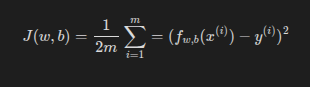
Cost Function

In [ ]:
def compute_cost(x,y,w,b):
    m = x.shape[0]
    cost = 0
    for i in range(m):
        f_wb = w*x[i] + b
        cost += (f_wb - y[i])**2

    return cost/(2*m)


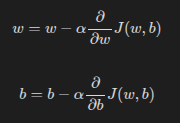
Gradient Descent

In [ ]:
def compute_gradient(x,y,w,b):
    m = x.shape[0]
    dw = 0
    db = 0
    for i in range(m):
        f_wb = w*x[i] + b
        db += (f_wb - y[i])*x[i]
        dw += (f_wb - y[i])

    return db/m , dw/m

In [ ]:
def gradient_descent(x,y,w,b,alpha,compute_cost,compute_gradient,num_iters):
    cost_history = []
    for i in range(num_iters):
        db, dw = compute_gradient(x,y,w,b)
        b = b - alpha*db
        w = w - alpha*dw
        cost = compute_cost(x,y,w,b)
        cost_history.append(cost)

        if i%100 == 0:
            print(f"Iteration {i:4}: Cost {cost:.2f}  ")
    return w,b,cost_history